# <font color="bordo">Programming Exercise 1 - Linear Regression</font>
<!-- http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/tree/master/notebooks/ -->
<p>
In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. 
<br>
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. 
<br>
The chain already has trucks in various cities and you have data for
profits and populations from the cities.

<p>
You would like to use this data to help you select which city to expand to next.
<br>
The file *ex1data1.txt* contains the dataset for our linear regression problem. 
<br>
The first column is the population of a city and the second column is the profit of a food truck in that city. 
<br>
A negative value for profit indicates a loss.

<p>
  - [Loading the data](#loading_data)
  - [Plotting the data](#plotting_data)
  - [Cost Function](#cost_function)
  - [Gradient Descent](#gradient_descent)
  - [Plotting the Cost vs. Number of iterations](#plot_cost_vs_iterations)

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Loading the data
<a id='loading_data'></a>

In [2]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]] # add x_0 := 1
y = np.c_[data[:,1]]

### Plotting the data
<a id='plotting_data'></a>

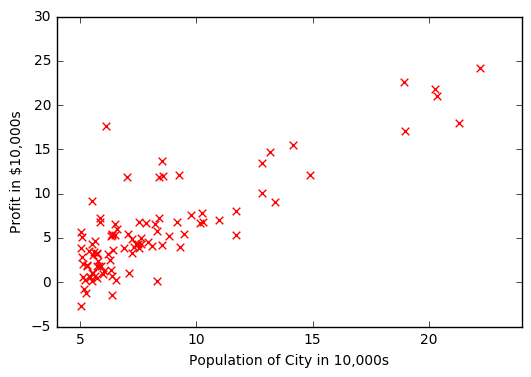

In [3]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

### Cost Function
<a id='cost_function'></a>
<p>
In this section, you will implement a function to calculate J(θ) so you can check the
convergence of your gradient descent implementation.
<p>
Recap:
<p>
<font size="3em">$h_θ(x) = θ^Tx$</font>
<p>
<font size="3em">$J = \frac{1}{2m}\sum_{i=1}^m{\left(h_θ(x^{(i)})-y^{(i)}\right)^2}$</font>

In [4]:
def costFunction(X, y, theta=[[0],[0]]):
    
    h = X.dot(theta)
    
    m = float(y.size) # number of samples
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [5]:
costFunction(X,y)

32.072733877455676

### Gradient Descent
<a id='gradient_descent'></a>
<p>
In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent.
<p>
Recap:
<p>
<font size="3em">
$\frac{\partial}{\partial\theta_j} J(\theta) = \frac{1}{m}\sum_{i=1}^m \left[h_\theta(x^{(i)} - y^{(i)})x_j^{(i)}\right]$
</font>
<img src="images/gradient descent algorithm.png">

In [6]:
# step of gradient descent
def step(X, y, theta, alpha):
    m = float(y.size)
    h = X.dot(theta)
    theta = theta - alpha * (1/m) * X.T.dot(h-y)
    return(theta)

# gradient descent algorithm
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    J_history = np.zeros(num_iters)
    
#     break_early = 1
#     epsilon = 0.00001
    
    for i in np.arange(num_iters):
        theta = step(X, y, theta, alpha)
        J_history[i] = costFunction(X, y, theta)
        
        # break if the converged (cost doesn't descrease)
#         if (break_early > 0 and i > 0 and (J_history[i-1] - J_history[i]) < epsilon):
#             print('converged at iteration: ', i)
#             return(theta, J_history[0:i])
        
        
    return(theta, J_history)

### Plot the Cost vs. Number of iterations
<a id='plot_cost_vs_iterations'></a>
<p>
A good way to verify that gradient descent is working correctly is to look
at the value of J(θ) and check that it is decreasing with each step.

theta:  [-3.63029144  1.16636235]
cost:  4.48338825659


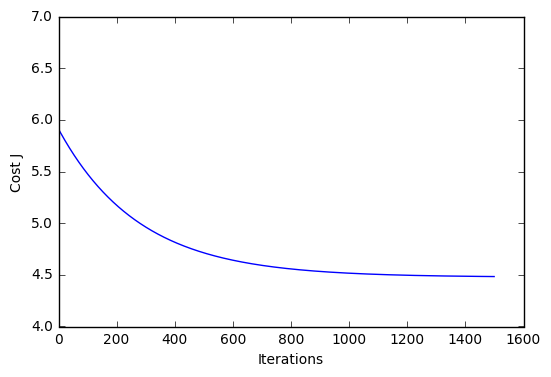

In [7]:
theta , Cost_J = gradientDescent(X, y)
print('theta: ', theta.ravel()) # theta for minimized cost J
print('cost: ', Cost_J[Cost_J.size-1])

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

### Plot the Contour and a 3D graph of: $J(θ_1, θ_2)$ vs. $θ_1, θ_2$
<p>
To understand the cost function $J(θ)$ better, you will now plot the cost over
a 2-dimensional grid of $θ_0$ and $θ_1$ values.
<p>
The cost function $J(θ)$ is bowl-shaped and has a global
mininum. 
<br>
(This is easier to see in the contour plot than in the 3D surface plot). 
<br>
This minimum is the optimal point for $θ_0$ and $θ_1$ , and each step of
gradient descent moves closer to this point.

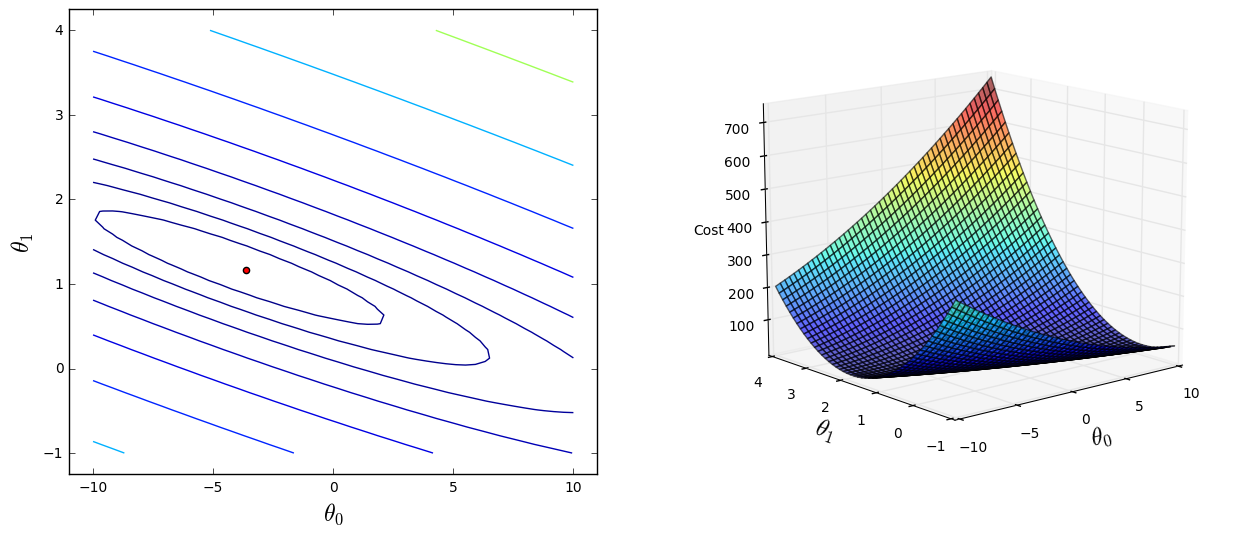

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = costFunction(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

## Prediction
<p>
Linear Regression Fit

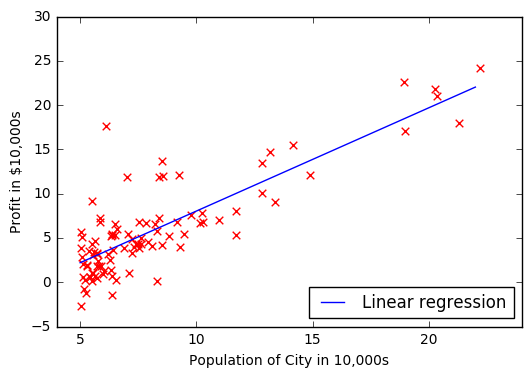

In [9]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [10]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)


[ 4519.7678677]
[ 45342.45012945]
